         Date    Open    High     Low   Close  Adj Close    Volume
0  2013-06-24  3.5525  3.5975  3.4775  3.5300   3.296333  58077200
1  2013-06-25  3.5675  3.5750  3.5175  3.5550   3.319679  45736000
2  2013-06-26  3.5950  3.6000  3.5200  3.5350   3.301003  57975200
3  2013-06-27  3.5450  3.5500  3.4650  3.5025   3.270654  80803600
4  2013-06-28  3.5025  3.5450  3.4575  3.5100   3.277657  43153600


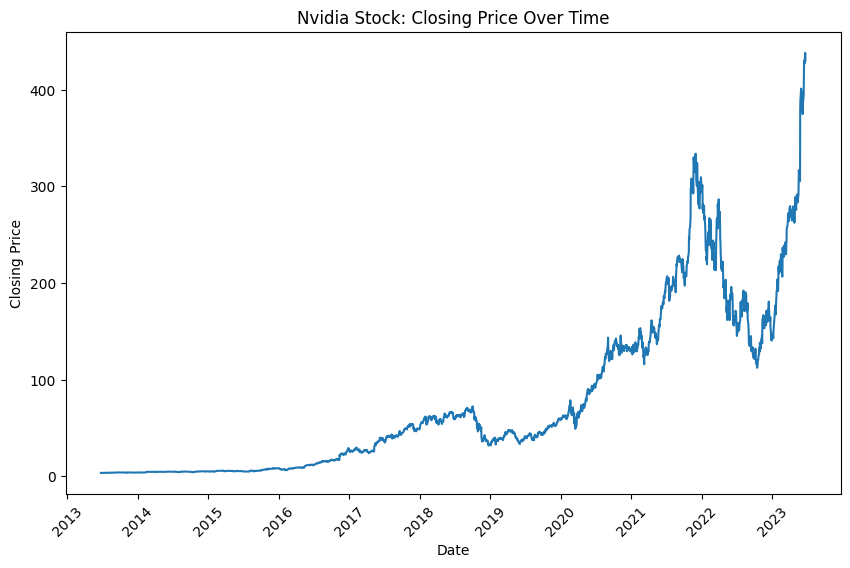

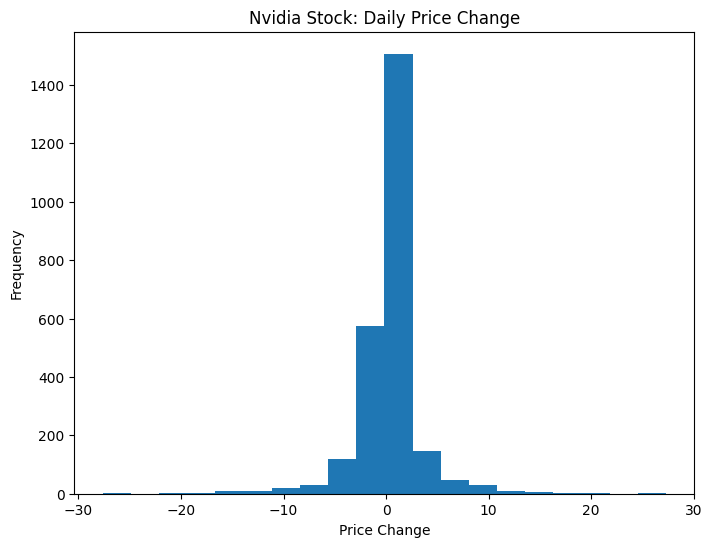

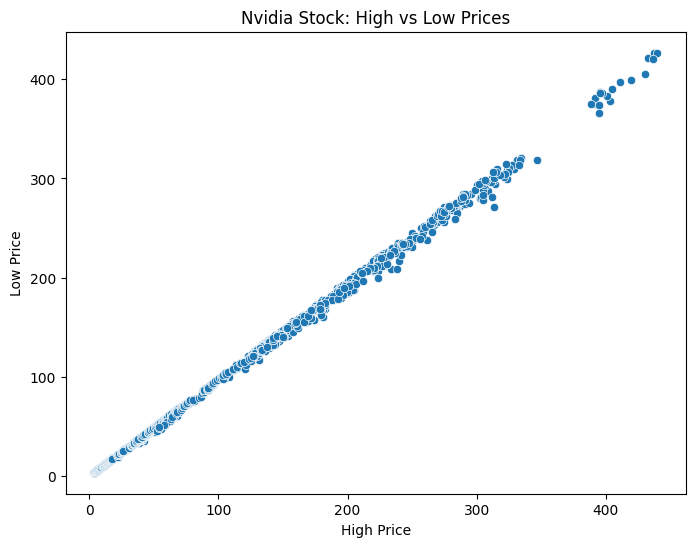

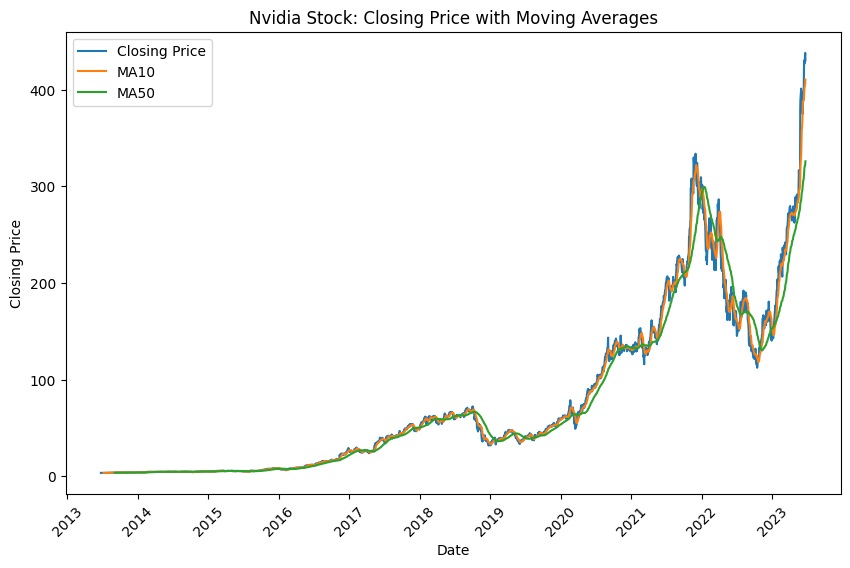

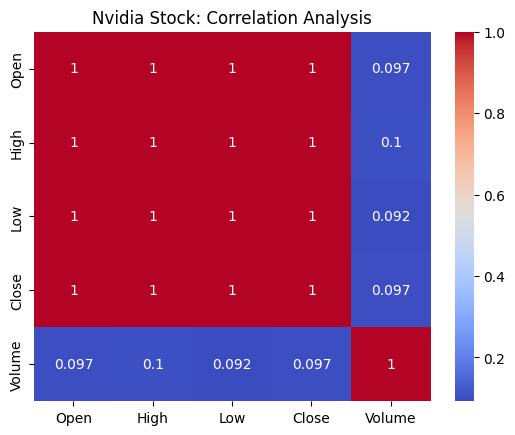

C:\Users\alias\AppData\Local\Temp\ipykernel_5156\1876797793.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ohlc['Date'] = pd.to_datetime(ohlc['Date'])
c:\Users\alias\anaconda3\lib\site-packages\mplfinance\_arg_validators.py:83: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


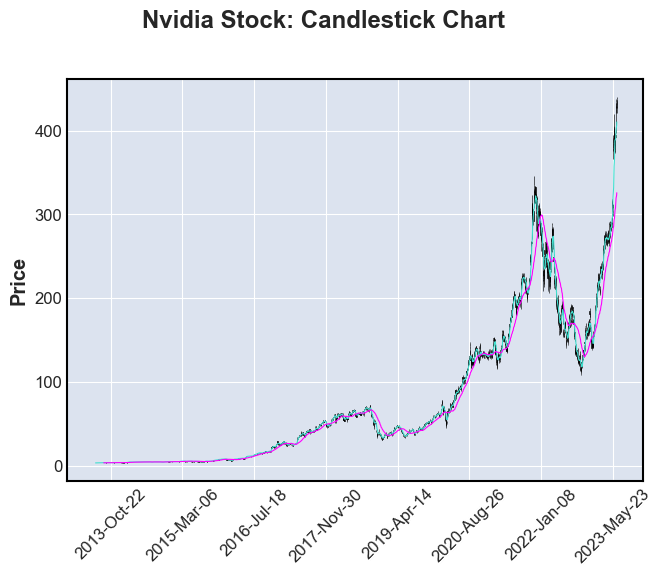

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpf

# Data loading
df = pd.read_csv('Nvidia Stocks June 22.csv')

# Display the first few rows of the dataset
print(df.head())

# Data cleaning
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Perform any other required data cleaning steps

# Feature engineering
# Add a new column for daily price change
df['Price Change'] = df['Close'] - df['Open']

# Data visualization
# Line plot of closing price over time
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'])
plt.title('Nvidia Stock: Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.show()

# Histogram of daily price change
plt.figure(figsize=(8, 6))
plt.hist(df['Price Change'], bins=20)
plt.title('Nvidia Stock: Daily Price Change')
plt.xlabel('Price Change')
plt.ylabel('Frequency')
plt.show()

# Scatter plot of high and low prices
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='High', y='Low')
plt.title('Nvidia Stock: High vs Low Prices')
plt.xlabel('High Price')
plt.ylabel('Low Price')
plt.show()

df['MA10'] = df['Close'].rolling(window=10).mean()
df['MA50'] = df['Close'].rolling(window=50).mean()

# Data visualization
# Line plot of closing price with moving averages
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'], label='Closing Price')
plt.plot(df['Date'], df['MA10'], label='MA10')
plt.plot(df['Date'], df['MA50'], label='MA50')
plt.title('Nvidia Stock: Closing Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Correlation analysis
correlation = df[['Open', 'High', 'Low', 'Close', 'Volume']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Nvidia Stock: Correlation Analysis')
plt.show()

# Candlestick chart
ohlc = df[['Date', 'Open', 'High', 'Low', 'Close']]
ohlc['Date'] = pd.to_datetime(ohlc['Date'])
ohlc.set_index('Date', inplace=True)
mpf.plot(ohlc, type='candle', title='Nvidia Stock: Candlestick Chart',
         ylabel='Price', mav=(10, 50), show_nontrading=True)
